In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#creating list of file paths
folder = './data/'
all_files = glob.glob(os.path.join(folder, "*.csv"))

In [3]:
# importing all files into dataframes within a list
dataframes = []
tables = []

for file in all_files: 
    df = pd.read_csv(file,sep=';', parse_dates=['timestamp'])
    file = file.split("/")[-1].split('.')[0]
    dataframes.append(df)
    tables.append(file)

In [4]:
df = pd.concat(dataframes)

In [5]:
df['weekday'] = df['timestamp'].dt.day_name()

In [6]:
df.set_index('timestamp', inplace=True)

In [7]:
df['hour'] = df.index.hour

In [8]:
df.head(2)

,customer_no,location,weekday,hour
timestamp,,,,
2019-09-03 07:02:00,1,fruit,Tuesday,7
2019-09-03 07:02:00,2,drinks,Tuesday,7


In [9]:
df.head(2)

,customer_no,location,weekday,hour
timestamp,,,,
2019-09-03 07:02:00,1,fruit,Tuesday,7
2019-09-03 07:02:00,2,drinks,Tuesday,7


In [10]:
df.location.value_counts()

checkout    7417
fruit       5122
dairy       4679
drinks      3905
spices      3754
Name: location, dtype: int64

In [11]:
df.weekday.value_counts()

Friday       5125
Thursday     5104
Wednesday    5050
Monday       4884
Tuesday      4714
Name: weekday, dtype: int64

In [12]:
df[['location','weekday']].value_counts()

location  weekday  
checkout  Thursday     1532
          Wednesday    1526
          Friday       1502
          Monday       1437
          Tuesday      1420
fruit     Friday       1057
          Wednesday    1043
          Thursday     1041
          Monday       1005
dairy     Wednesday     976
fruit     Tuesday       976
dairy     Thursday      965
          Friday        932
          Tuesday       911
          Monday        895
drinks    Friday        844
          Monday        797
spices    Thursday      790
          Friday        790
drinks    Thursday      776
          Wednesday     775
spices    Monday        750
          Wednesday     730
drinks    Tuesday       713
spices    Tuesday       694
dtype: int64

In [13]:
locations = df['location'].unique()
locations

array(['fruit', 'drinks', 'dairy', 'spices', 'checkout'], dtype=object)

## Plots da

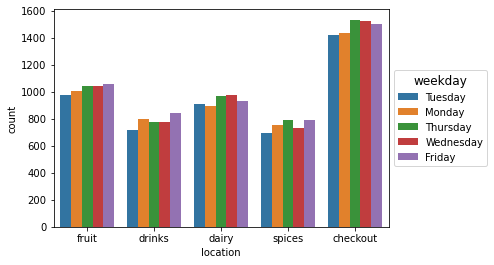

In [23]:
sns.countplot(x=df.location, hue=df.weekday)
plt.legend(loc='center left',bbox_to_anchor=(1,0.5),title='weekday',title_fontsize=12); 

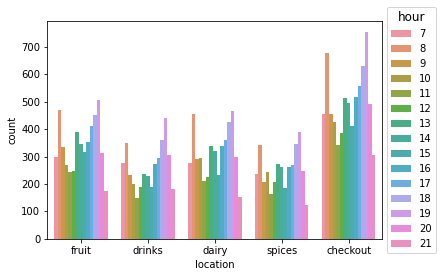

In [24]:
sns.countplot(x=df.location, hue=df.hour)
plt.legend(loc='center left',bbox_to_anchor=(1,0.5),title='hour',title_fontsize=12);